# Neural Networks
Week Seven - Sept 12, 2022

For a really good visual description of Neural Networks, see [3Blue1Brown's "But what is a neural network"](https://www.youtube.com/watch?v=aircAruvnKk) and for a deeper dive into the training algorithm, see [3Blue1Brown's "What is backpropagation really doing?"](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

... also a brief intro to the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)


Note, the author has all of the code available on [Github](https://github.com/joelgrus/data-science-from-scratch)

## Chapter 18 - 

In [1]:
import sys
# Let us first install the scikit-learn packages
!conda install --yes --prefix {sys.prefix} scikit-learn
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} tqdm



/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found


## Activation Functions
 * identity - straight linear y=x
 * step - sudden transition from 0 to 1 at the threshold
 * Rectified Linear Unit (ReLU) - significantly faster to compute, but behaves similar to sigmoidal
 * tanh - similar to sigmoidal, but -1 to +1
 * logistical/sigmoidal - similar to tanh, but 0-1

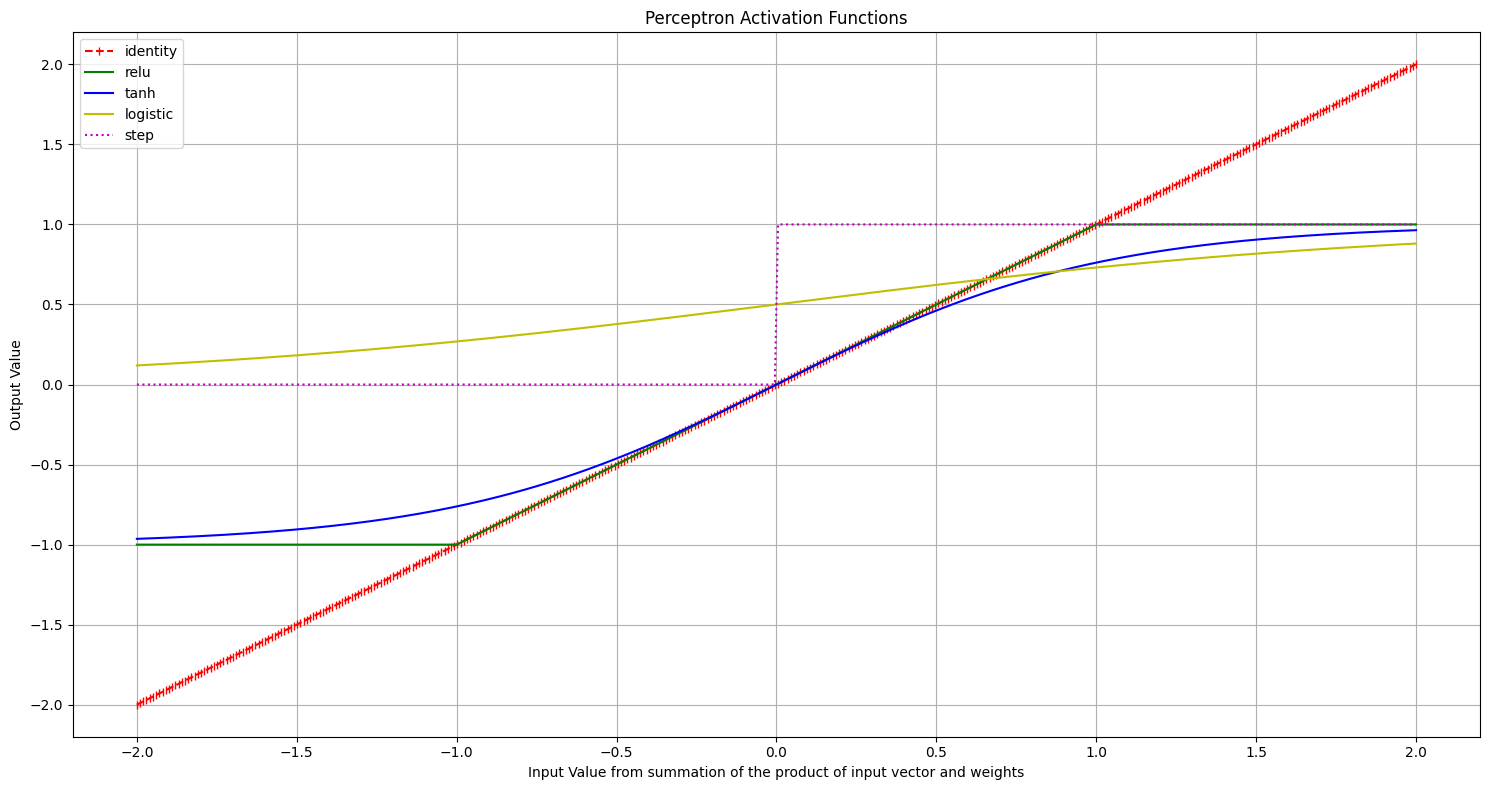

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import math

def step_funct(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

x = np.linspace(-2, 2, 400)
y1 = [ i for i in x]
y2 = [ max(-1,min(i,1)) for i in x]
y3 = np.tanh(
    x)  
y4 = [(1/(1+math.exp(-i))) for i in x] 
y5 = [step_funct(i) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y1, 'r|--', label='identity')
ax.plot(x, y2, color='g', label='relu')
ax.plot(x, y3, color='b', label='tanh')
ax.plot(x, y4, color='y', label='logistic')
ax.plot(x, y5,'m:', label='step')
plt.gcf().set_size_inches(15,8)
plt.xlabel("Input Value from summation of the product of input vector and weights")
plt.ylabel("Output Value")
plt.title("Perceptron Activation Functions")
plt.grid(True, which='both')
plt.legend()
plt.show()


## Can we teach a perceptron some basic 'AND' boolean logic?

Building Training data...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.0000
Overall Test Error     = 0.0000


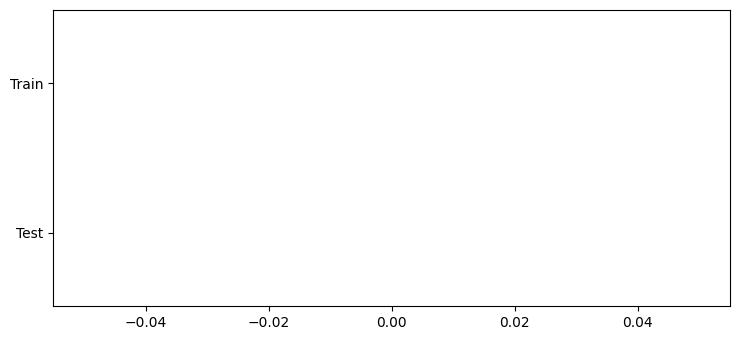

In [67]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(100):                    # <-- We need sufficient training data, so expirement with larger training data sizes here
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a and b)
    X1_train.append([a, b])
    y1_train.append(c)

print("Training the model...")
ptron = Perceptron()
ptron.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a and b)
    X1_test.append([a, b])
    y1_test.append(c)
    
print("Results...")
train_error = MSE(y1_train, ptron.predict(X1_train))
results = ptron.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
#b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
#plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()

## Can we teach a perceptron some basic 'XOR' boolean logic?

Building Training data...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.4954
Overall Test Error     = 0.5400


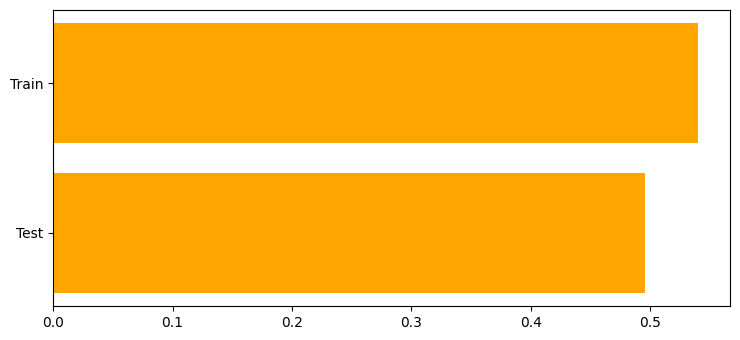

In [68]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error as MSE
from matplotlib import pyplot as plt
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(5000):                    # <-- We need sufficient training data, so expirement with larger training data sizes here
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)  # BTW - the carrot ('^') symbol is an XOR operator
    X1_train.append([a, b])
    y1_train.append(c)

print("Training the model...")
ptron = Perceptron()
ptron.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_test.append([a, b])
    y1_test.append(c)
    
print("Results...")
train_error = MSE(y1_train, ptron.predict(X1_train))
results = ptron.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = {:>5,.4f}".format(train_error))
print("Overall Test Error     = {:>5,.4f}".format(test_error))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
#b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
#plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()

## What about a multi-layer perceptron?

Building Training data...
Building Test data...


NN Hidden Layer Variations:   0%|          | 0/12 [00:00<?, ?it/s]

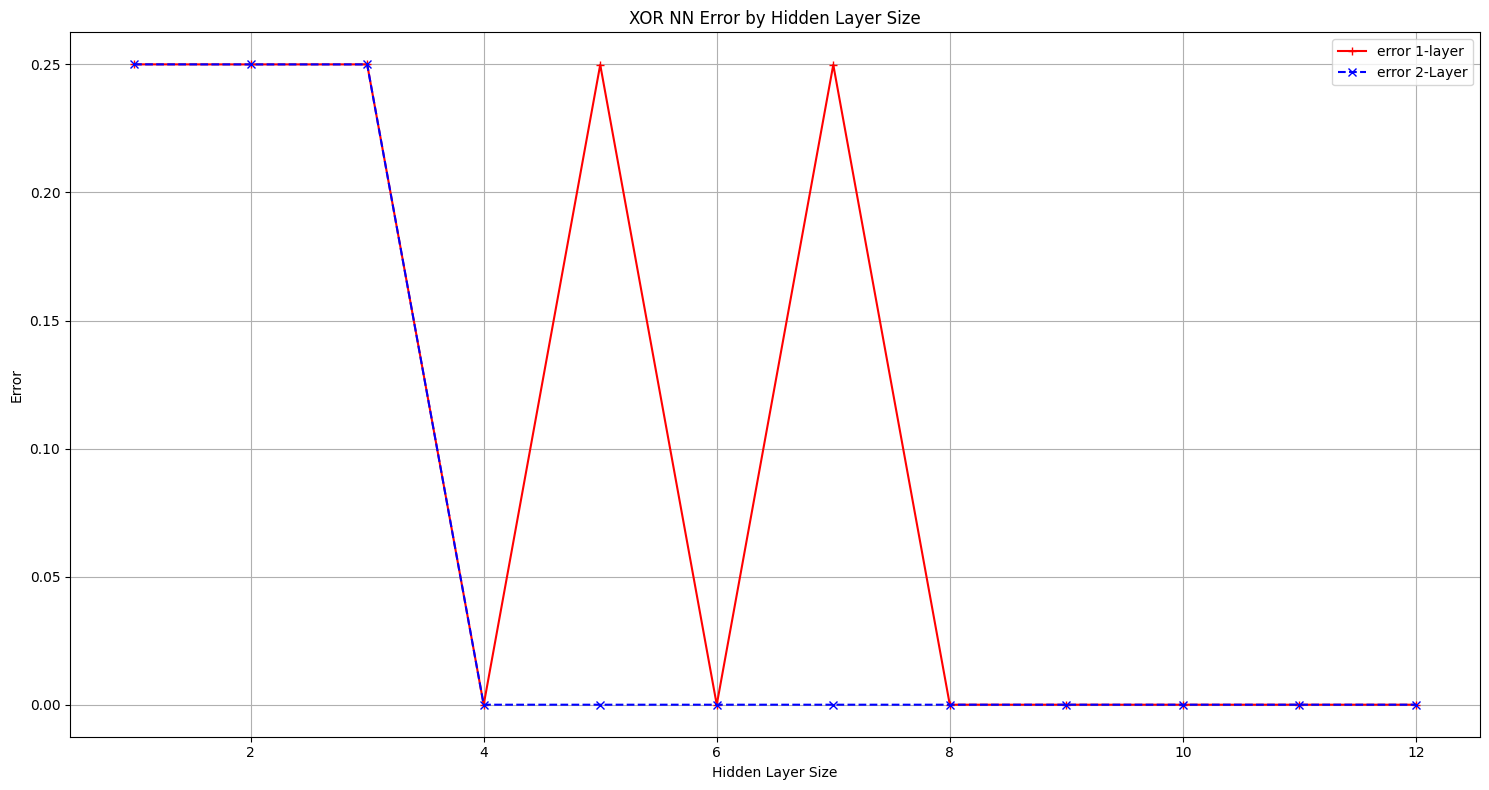

In [96]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
import math
import random

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(10000):                    # <-- We need sufficient training data, so expirement with larger training data sizes here (hint: add a zero)
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Building Test data...")
for i in range(100):
    a = random.randint(0, 1)
    b = random.randint(0, 1)
    c = (a ^ b)
    X1_test.append([a, b])
    y1_test.append(c)

errors = []
errors2 = []
hl_size = []

for i in tqdm(range(1,13), desc="NN Hidden Layer Variations"):
    hl_size.append(i)
    ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
                activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
                learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
                alpha=1e-5,
                hidden_layer_sizes=(i),
                random_state=1,
                max_iter=200,
                shuffle=True,
                momentum=0.9,
                verbose=False
                )
    
    ann.fit(X1_train,y1_train)
    errors.append(MSE(y1_train, ann.predict(X1_train)))
    ann2 = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
                activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
                learning_rate="constant",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
                alpha=1e-5,
                hidden_layer_sizes=(i,i),
                random_state=1,
                max_iter=200,
                shuffle=True,
                momentum=0.9,
                verbose=False
                )
    ann2.fit(X1_train,y1_train)
    errors2.append(MSE(y1_train, ann2.predict(X1_train)))
    
    
fig, ax = plt.subplots()
ax.plot(hl_size,errors , 'r-+', label='error 1-layer')
ax.plot(hl_size,errors2 , 'b--x', label='error 2-Layer')
plt.gcf().set_size_inches(15,8)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Error")
plt.title("XOR NN Error by Hidden Layer Size")
plt.grid(True, which='both')
plt.legend()
plt.show()

## How about some fundamental math?

Building Training data...
Creating a model base...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.08350192790216175
Overall Test Error     = 0.10439029469155571
IF a=3 and b=4, then c=  [5.0250628]


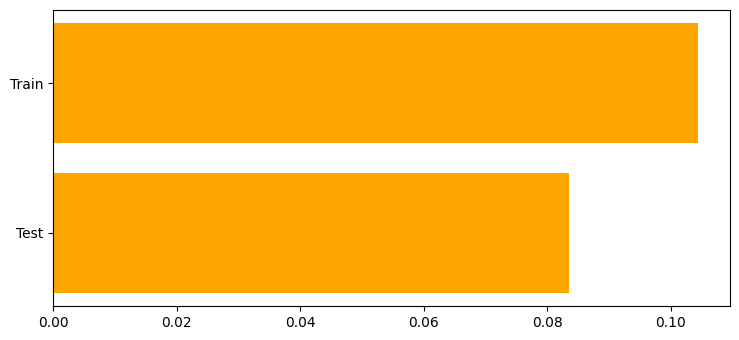

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as PERERR
import matplotlib.pyplot as plt
import math
import random


#### Pythagorean Theorem (a^2 + b^2 = c^2)
X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

print("Building Training data...")
for i in range(50000):
    a = random.random() * 100
    b = random.random() * 100
    c = math.sqrt(a*a + b*b)    # Pythagorean Theorem
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Creating a model base...")
ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="adaptive",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(20),
            #hidden_layer_sizes=(20,20),
            random_state=1,
            max_iter=500,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

print("Training the model...")
ann.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = random.random() * 100          # <-- Consider the magnitude of the domain/range here and how that might effect the error calculation...
    b = random.random() * 100
    c = math.sqrt(a*a + b*b)    # Pythagorean Theorem
    X1_test.append([a, b])
    y1_test.append(c)

print("Results...")

results = ann.predict(X1_test)

test_error = MSE(y1_test, results, squared=True)
#test_error = PERERR(y1_test, results, squared=True)

train_error = MSE(y1_train, ann.predict(X1_train))
#train_error = PERERR(y1_train, ann.predict(X1_train))

print("Overall Training Error = %s" % train_error)
print("Overall Test Error     = %s" % test_error)
print("IF a=3 and b=4, then c=  %s" % ann.predict([[3,4]]))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
#b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
#plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()




## What about a function we don't know how to write necessarily?

Pop quiz: without using a lookup table or a Trigonometric Identity, how do you compute the tangent function (i.e., tan(angle))? 
... unless you have an advanced degree in mathematics (or are a true math nerd), you probably don't know... but can we still teach a neural network?


Building Training data...


  0%|          | 0/10000 [00:00<?, ?iter/s]

Creating a model base...
Training the model...
Building Test data...
Results...
Overall Training Error = 0.001868744057960986
Overall Test Error     = 0.0017074890357857615


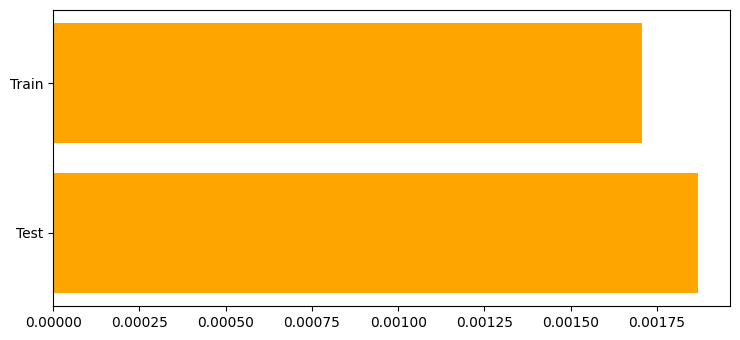

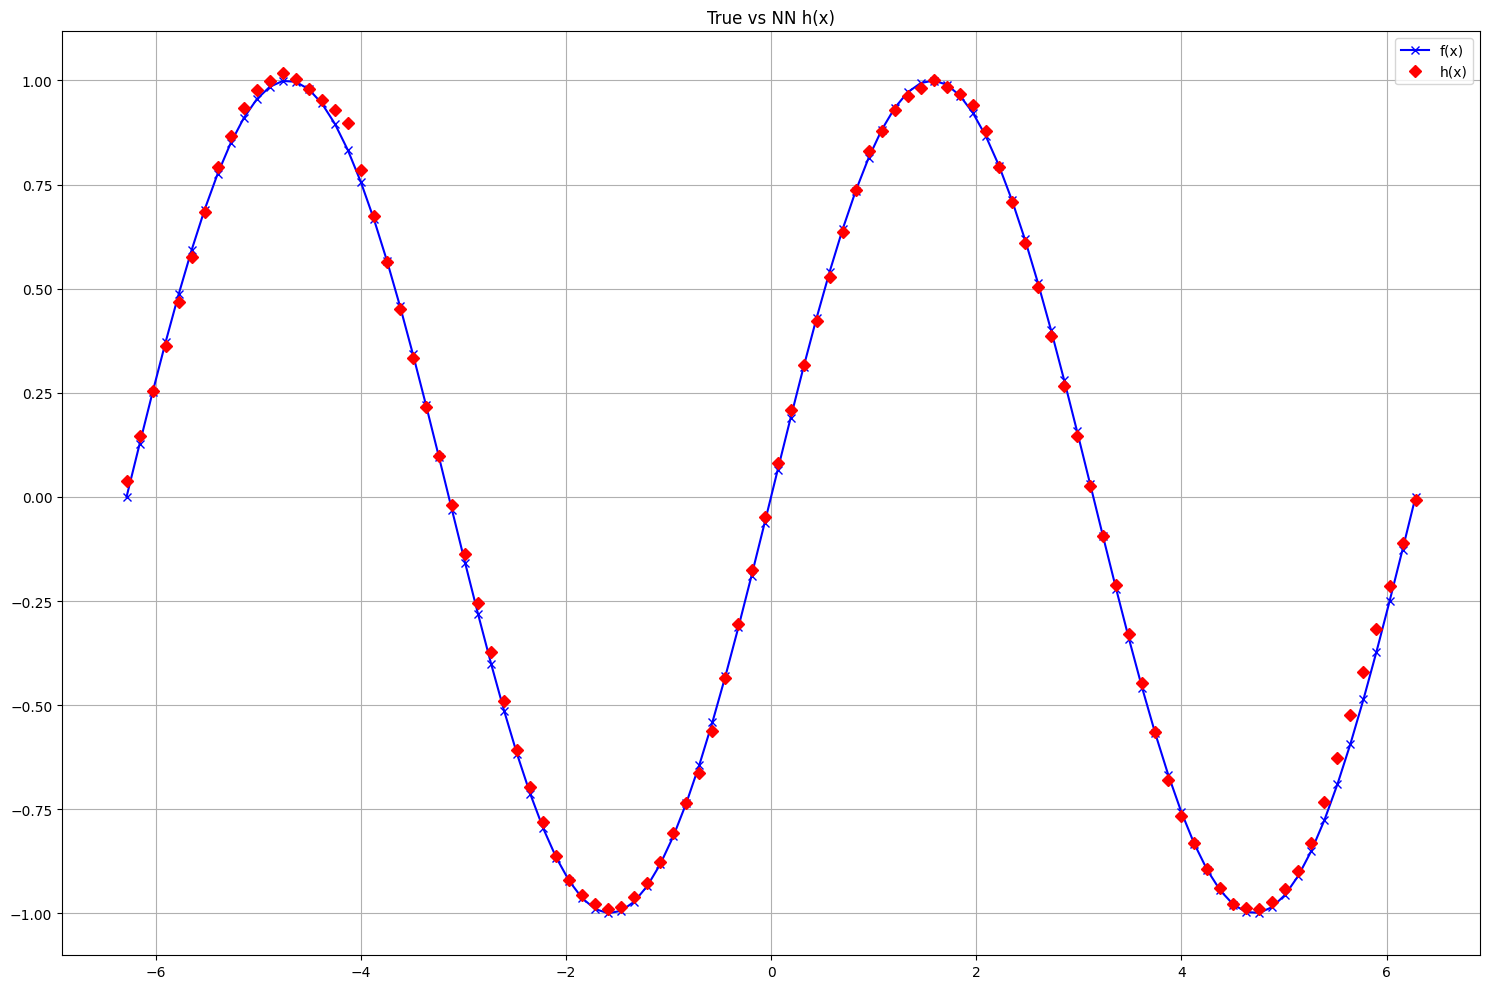

In [120]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from tqdm.notebook import tqdm

X1_train = []
y1_train = []
X1_test  = []
y1_test  = []

def f(_x):
    return math.sin(_x)

def generator():
    return (random.random() - 0.5) * 5 * 3.14 # This is just for input range, so exact PI value is not needed

print("Building Training data...")
for i in tqdm(range(10000), unit="iter"):
    a = generator()
    b = 1
    c = f(a)                     # Tangent Funtion
    X1_train.append([a, b])
    y1_train.append(c)
#print("Training Data: %s" % X1_train)
#print("Training Truth: %s" % y1_train)

print("Creating a model base...")
ann = MLPRegressor(solver='adam',       # solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
            activation='relu',          # activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
            learning_rate="adaptive",   # learning_rate{‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
            alpha=1e-5,
            hidden_layer_sizes=(25,25), # This network topology is good for sine and cosine
            random_state=1,
            max_iter=200,
            shuffle=True,
            momentum=0.9,
            verbose=False
            )

print("Training the model...")
ann.fit(X1_train,y1_train)

print("Building Test data...")
for i in range(100):
    a = generator()
    b = 1
    c = f(a)                     # Tangent Funtion
    X1_test.append([a, b])
    y1_test.append(c)

print("Results...")
train_error = MSE(y1_train, ann.predict(X1_train))
results = ann.predict(X1_test)
test_error = MSE(y1_test, results, squared=True)
print("Overall Training Error = %s" % train_error)
print("Overall Test Error     = %s" % test_error)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
errorTypes = ["Test", "Train"]
wrongs = [train_error, test_error]
rights = [(1.0 - train_error), (1.0 - test_error)]
b1 = plt.barh(errorTypes, wrongs, color="orange")
#b2 = plt.barh(errorTypes, rights, left=wrongs, color="blue")
#plt.legend([b1, b2], ["errors", "correct"], title="Test Results", loc="upper right")
plt.show()


x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
fx = [f(i) for i in x]
hx = [ann.predict([[i, 1]])[0] for i in x]

fig, ax = plt.subplots()
ax.plot(x, fx, 'b-x', label='f(x)')
ax.plot(x, hx, 'rD', label='h(x)')
plt.gcf().set_size_inches(15,10)
plt.title("True vs NN h(x)")
plt.grid(True, which='both')
plt.legend()
plt.show()

## So How does a Neural Network Actually Learn? (Code from the Book)

The code below is slightly modified from the author's code: https://github.com/joelgrus/data-science-from-scratch/blob/master/scratch/neural_networks.py

In [119]:
import math, random, sys, os
# Setting up to use the author's library, cloned into the 'scratch' folder here (MIT License retained)
sys.path.insert(0,os.path.abspath('.'))

from scratch.linear_algebra import Vector, dot
from typing import List
from scratch.gradient_descent import gradient_step
from tqdm.notebook import tqdm
    

def step_function(x: float) -> float:
    return 1.0 if x >= 0 else 0.0

def perceptron_output(weights: Vector, bias: float, x: Vector) -> float:
    """Returns 1 if the perceptron 'fires', 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

and_weights = [2., 2]
and_bias = -3.

#
#  X1 -- w1=2  ----+
#                  \
#  X2 -- w2=2  -----+-> (step(x)) --> Y
#                  |
#  b  -- w3=-3 ----+
#
# Y = step(x1 * w1 + x2 * w2 + b * w3)

assert perceptron_output(and_weights, and_bias, [1, 1]) == 1
assert perceptron_output(and_weights, and_bias, [0, 1]) == 0
assert perceptron_output(and_weights, and_bias, [1, 0]) == 0
assert perceptron_output(and_weights, and_bias, [0, 0]) == 0

or_weights = [2., 2]
or_bias = -1.

#
#  X1 -- w1=2  ----+
#                  \
#  X2 -- w2=2  -----+-> (step(x)) --> Y
#                  |
#  b  -- w3=-1 ----+
#
# Y = step(x1 * w1 + x2 * w2 + b * w3)

assert perceptron_output(or_weights, or_bias, [1, 1]) == 1
assert perceptron_output(or_weights, or_bias, [0, 1]) == 1
assert perceptron_output(or_weights, or_bias, [1, 0]) == 1
assert perceptron_output(or_weights, or_bias, [0, 0]) == 0

not_weights = [-2.]
not_bias = 1.

#
#  X1 -- w1=-2 ----+
#                  \
#  b  -- w2=1  -----+-> (step(x)) --> Y
#
# Y = step(x1 * w1 + b * w2)

assert perceptron_output(not_weights, not_bias, [0]) == 1
assert perceptron_output(not_weights, not_bias, [1]) == 0



def sigmoid(t: float) -> float:
    return 1 / (1 + math.exp(-t))

def neuron_output(weights: Vector, inputs: Vector) -> float:
    # weights includes the bias term, inputs includes a 1
    return sigmoid(dot(weights, inputs))

# Notice now we will use a Sigmoidal function instead of a step-function (or ReLU)
def feed_forward(neural_network: List[List[Vector]],
                 input_vector: Vector) -> List[Vector]:
    """
    Feeds the input vector through the neural network.
    Returns the outputs of all layers (not just the last one).
    """
    outputs: List[Vector] = []

    for layer in neural_network:
        input_with_bias = input_vector + [1]              # Add a constant.
        output = [neuron_output(neuron, input_with_bias)  # Compute the output
                  for neuron in layer]                    # for each neuron.
        outputs.append(output)                            # Add to results.

        # Then the input to the next layer is the output of this one
        input_vector = output

    return outputs

xor_network = [# hidden layer
               [[20., 20, -30],      # 'and' neuron
                [20., 20, -10]],     # 'or'  neuron
               # output layer
               [[-60., 60, -30]]]    # '2nd input but not 1st input' neuron

#
#      b -- w = -30---+
#                      \
#  X1 -- w=20  ----+--> (sig(x)) -- w=-60 ---+
#                  |                         \
#  X2 -- w=20  ----+--> (sig(x)) -- w=60 -----+-> (sig(x)) --> Y 
#                     /                      /
#     b -- w=-10----+          b -- w=-30 --+
#
# Y = sigmoidal(
#       (sigmoidal(x1*20 + x2*20 - 30)) *-60
#       (sigmoidal(x1*20 + x2*20 - 10)) * 60 
#       - 30)

# feed_forward returns the outputs of all layers, so the [-1] gets the
# final output, and the [0] gets the value out of the resulting vector
assert 0.000 < feed_forward(xor_network, [0, 0])[-1][0] < 0.001
assert 0.999 < feed_forward(xor_network, [1, 0])[-1][0] < 1.000
assert 0.999 < feed_forward(xor_network, [0, 1])[-1][0] < 1.000
assert 0.000 < feed_forward(xor_network, [1, 1])[-1][0] < 0.001

def sqerror_gradients(network: List[List[Vector]],
                      input_vector: Vector,
                      target_vector: Vector) -> List[List[Vector]]:
    """
    Given a neural network, an input vector, and a target vector,
    make a prediction and compute the gradient of the squared error
    loss with respect to the neuron weights.
    """
    # forward pass
    hidden_outputs, outputs = feed_forward(network, input_vector)

    # gradients with respect to output neuron pre-activation outputs
    output_deltas = [output * (1 - output) * (output - target)
                     for output, target in zip(outputs, target_vector)]

    # gradients with respect to output neuron weights
    output_grads = [[output_deltas[i] * hidden_output
                     for hidden_output in hidden_outputs + [1]]
                    for i, output_neuron in enumerate(network[-1])]

    # gradients with respect to hidden neuron pre-activation outputs
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                         dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # gradients with respect to hidden neuron weights
    hidden_grads = [[hidden_deltas[i] * input for input in input_vector + [1]]
                    for i, hidden_neuron in enumerate(network[0])]

    return [hidden_grads, output_grads]

[   # hidden layer
    [[7, 7, -3],     # computes OR
     [5, 5, -8]],    # computes AND
    # output layer
    [[11, -12, -5]]  # computes "first but not second"
]

def fizz_buzz_encode(x: int) -> Vector:
    if x % 15 == 0:
        return [0, 0, 0, 1]
    elif x % 5 == 0:
        return [0, 0, 1, 0]
    elif x % 3 == 0:
        return [0, 1, 0, 0]
    else:
        return [1, 0, 0, 0]

assert fizz_buzz_encode(2) == [1, 0, 0, 0]
assert fizz_buzz_encode(6) == [0, 1, 0, 0]
assert fizz_buzz_encode(10) == [0, 0, 1, 0]
assert fizz_buzz_encode(30) == [0, 0, 0, 1]

def binary_encode(x: int) -> Vector:
    binary: List[float] = []

    for i in range(10):
        binary.append(x % 2)
        x = x // 2

    return binary

#                             1  2  4  8 16 32 64 128 256 512
assert binary_encode(0)   == [0, 0, 0, 0, 0, 0, 0, 0,  0,  0]
assert binary_encode(1)   == [1, 0, 0, 0, 0, 0, 0, 0,  0,  0]
assert binary_encode(10)  == [0, 1, 0, 1, 0, 0, 0, 0,  0,  0]
assert binary_encode(101) == [1, 0, 1, 0, 0, 1, 1, 0,  0,  0]
assert binary_encode(999) == [1, 1, 1, 0, 0, 1, 1, 1,  1,  1]

def argmax(xs: list) -> int:
    """Returns the index of the largest value"""
    return max(range(len(xs)), key=lambda i: xs[i])

assert argmax([0, -1]) == 0               # items[0] is largest
assert argmax([-1, 0]) == 1               # items[1] is largest
assert argmax([-1, 10, 5, 20, -3]) == 3   # items[3] is largest


random.seed(0)
    
# training data
xs = [[0., 0], [0., 1], [1., 0], [1., 1]]
ys = [[0.], [1.], [1.], [0.]]
   
# start with random weights
network = [ # hidden layer: 2 inputs -> 2 outputs
                [[random.random() for _ in range(2 + 1)],   # 1st hidden neuron
                 [random.random() for _ in range(2 + 1)]],  # 2nd hidden neuron
                # output layer: 2 inputs -> 1 output
                [[random.random() for _ in range(2 + 1)]]   # 1st output neuron
              ]
    

learning_rate = 1.0
    
for epoch in tqdm(range(20000), desc="neural net for xor"):
        for x, y in zip(xs, ys):
            gradients = sqerror_gradients(network, x, y)
    
            # Take a gradient step for each neuron in each layer
            network = [[gradient_step(neuron, grad, -learning_rate)
                        for neuron, grad in zip(layer, layer_grad)]
                       for layer, layer_grad in zip(network, gradients)]
    
# check that it learned XOR
assert feed_forward(network, [0, 0])[-1][0] < 0.01
assert feed_forward(network, [0, 1])[-1][0] > 0.99
assert feed_forward(network, [1, 0])[-1][0] > 0.99
assert feed_forward(network, [1, 1])[-1][0] < 0.01
    
xs = [binary_encode(n) for n in range(101, 1024)]
ys = [fizz_buzz_encode(n) for n in range(101, 1024)]
    
NUM_HIDDEN = 25
    
network = [
        # hidden layer: 10 inputs -> NUM_HIDDEN outputs
        [[random.random() for _ in range(10 + 1)] for _ in range(NUM_HIDDEN)],
    
        # output_layer: NUM_HIDDEN inputs -> 4 outputs
        [[random.random() for _ in range(NUM_HIDDEN + 1)] for _ in range(4)]
    ]
    
from scratch.linear_algebra import squared_distance
    
learning_rate = 1.0
    
with tqdm(range(500)) as t:
        for epoch in t:
            epoch_loss = 0.0
    
            for x, y in zip(xs, ys):
                predicted = feed_forward(network, x)[-1]
                epoch_loss += squared_distance(predicted, y)
                gradients = sqerror_gradients(network, x, y)
    
                # Take a gradient step for each neuron in each layer
                network = [[gradient_step(neuron, grad, -learning_rate)
                            for neuron, grad in zip(layer, layer_grad)]
                        for layer, layer_grad in zip(network, gradients)]
    
            t.set_description(f"fizz buzz (loss: {epoch_loss:.2f})")
    
num_correct = 0
    
for n in range(1, 101):
        x = binary_encode(n)
        predicted = argmax(feed_forward(network, x)[-1])
        actual = argmax(fizz_buzz_encode(n))
        labels = [str(n), "fizz", "buzz", "fizzbuzz"]
        print(n, labels[predicted], labels[actual])
    
        if predicted == actual:
            num_correct += 1
    
print(num_correct, "/", 100)

neural net for xor:   0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

1 1 1
2 2 2
3 fizz fizz
4 4 4
5 buzz buzz
6 fizz fizz
7 7 7
8 8 8
9 fizz fizz
10 buzz buzz
11 11 11
12 fizz fizz
13 13 13
14 14 14
15 fizzbuzz fizzbuzz
16 16 16
17 17 17
18 fizz fizz
19 19 19
20 20 buzz
21 fizz fizz
22 22 22
23 23 23
24 fizz fizz
25 buzz buzz
26 26 26
27 fizz fizz
28 28 28
29 29 29
30 fizzbuzz fizzbuzz
31 31 31
32 32 32
33 fizz fizz
34 34 34
35 buzz buzz
36 fizz fizz
37 37 37
38 38 38
39 fizz fizz
40 buzz buzz
41 41 41
42 fizz fizz
43 43 43
44 44 44
45 fizzbuzz fizzbuzz
46 46 46
47 47 47
48 fizz fizz
49 49 49
50 buzz buzz
51 fizz fizz
52 52 52
53 53 53
54 fizz fizz
55 buzz buzz
56 56 56
57 fizz fizz
58 58 58
59 59 59
60 fizzbuzz fizzbuzz
61 61 61
62 62 62
63 fizz fizz
64 64 64
65 buzz buzz
66 fizz fizz
67 67 67
68 68 68
69 fizz fizz
70 buzz buzz
71 71 71
72 fizz fizz
73 73 73
74 74 74
75 fizzbuzz fizzbuzz
76 76 76
77 77 77
78 fizz fizz
79 79 79
80 80 buzz
81 fizz fizz
82 82 82
83 83 83
84 fizz fizz
85 fizz buzz
86 86 86
87 fizz fizz
88 88 88
89 89 89
90 fizzbuzz fizzbu